# Market Basket Analysis using FP-Growth - Cian Allen
## Grocery transaction data mining for frequent patterns
#### This data set was retrieved from Kaggle. It can be found at https://www.kaggle.com/datasets/irfanasrullah/groceries/data

### Get the necessary imports:

In [26]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
import numpy as np
import matplotlib.pyplot as plt

### Let's look at some initial information about our data frame:

In [27]:
# Load the CSV file
df = pd.read_csv('groceries.csv')

# Display the some information about our DataFrame
print('First items of data frame:')
print(df.head())
print('\n' + '-' * 50 + '\n\nSome information about our data frame:')
print(df.info())
print('\n' + '-' * 50 + "\n\nLet's look at the first item in our data frame:")
print(df.iloc(0)[0])

First items of data frame:
   Item(s)            Item 1               Item 2          Item 3  \
0        4      citrus fruit  semi-finished bread       margarine   
1        3    tropical fruit               yogurt          coffee   
2        1        whole milk                  NaN             NaN   
3        4         pip fruit               yogurt    cream cheese   
4        4  other vegetables           whole milk  condensed milk   

                     Item 4 Item 5 Item 6 Item 7 Item 8 Item 9  ... Item 23  \
0               ready soups    NaN    NaN    NaN    NaN    NaN  ...     NaN   
1                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
2                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
3              meat spreads    NaN    NaN    NaN    NaN    NaN  ...     NaN   
4  long life bakery product    NaN    NaN    NaN    NaN    NaN  ...     NaN   

  Item 24 Item 25 Item 26 Item 27 Item 28 Item 29 Item 30 Item 31 Item 32  
0     N

#### The initial data frame:
##### -has 33 columns and 9,835 entries (rows)
##### -each row/entry correlates with a transaction
##### -the first column of every row states how many items are in the transaction
##### -each column after the first represents an item purchased. This extends to a maximum of 32 items for a single transaction. 
##### We'll need to some data cleaning and modifications...

## 1. Data Cleaning
### Let's make sure that: 
#####  -the first column, which states how many items are present in the transaction, is greater than 0 and correctly states the number of items
#####  -every column is either a string relating to an item, or is NaN
#####  -drop rows where there's no transaction value defined

### Note: 
##### -we'll later convert our data frame to use one-hot encoding
##### -we won't drop duplicates since it'd make sense for two transactions to have the same items purchased (there is no date associated with a transaction)

In [28]:
# Retrieve number of columns as a variable
num_columns = df.shape[1]

# Record any transactions that are incorrect
bad_transactions = {}

# Remove any row that doesn't have it's # of transactions defined
df = df.dropna(subset=["Item(s)"])

# Iterate through every transaction
for index, row in df.iterrows(): 

    # First number in transaction is how many items are present
    num_items_defined = row.iloc[0] 
    if num_items_defined <= 0:
        # If the number of items is less than or equal to 0, let's consider this a useless (bad) transaction
        print("Transaction found with <= 0 items. Index is " + str(index))
        bad_transactions[index] = row
    else: 
        # Loop through every item in the transaction
        num_items_found = 0
        for i in range(1, num_columns):
            item = row.iloc[i] 
            if isinstance(item, str):
                # If this column value is a string, record it as an item
                num_items_found += 1
            elif not(np.isnan(item)):
                # If the column value is not a string and it is not NaN, mark this as a bad transaction
                bad_transactions[index] = row

        if num_items_defined != num_items_found:
            # Ensure the number of items found matches the defined number of transactions
            bad_transactions[index] = row

print("Total number of 'bad' transactions that had to be removed: " + str(len(bad_transactions)))

Total number of 'bad' transactions that had to be removed: 0


#### There appears to be no 'bad' transactions!
#### Now, let's do some...
# 2. Initial Analysis
#### Let's first find all the unique items and count how often they appear in the data

In [29]:
frequent_items = {}
num_items_in_transactions = 0
num_transactions = df.shape[0]
min_num_items = float('inf')
min_num_items_transaction = None
max_num_items = float('-inf')
max_num_items_transaction = None

def check_frequent_item(item):
    # If item is in freq item dictionary, add one. Else, add it to the dictionary
    if frequent_items.get(item):  
        frequent_items[item] += 1
    else:
        frequent_items[item] = 1

# Iterate through every transaction
for index, row in df.iterrows(): 

    # First number in transaction is how many items are present
    number_of_items = row.iloc[0] 

    # Update min or max number of items in transaction if needed
    if number_of_items < min_num_items:
        min_num_items = number_of_items
        min_num_items_transaction = row
    if number_of_items > max_num_items:
        max_num_items = number_of_items
        max_num_items_transaction = row

    # Update total number of items for all transactions
    num_items_in_transactions += number_of_items

    # Loop through every item in the transaction
    for i in range(1, number_of_items + 1):
        item = row.iloc[i]  

        # Update frequent item dictionary with this item
        check_frequent_item(item)

# Sort dictionary by value in descending order
frequent_items = dict(sorted(frequent_items.items(), key=lambda item: item[1], reverse=True))

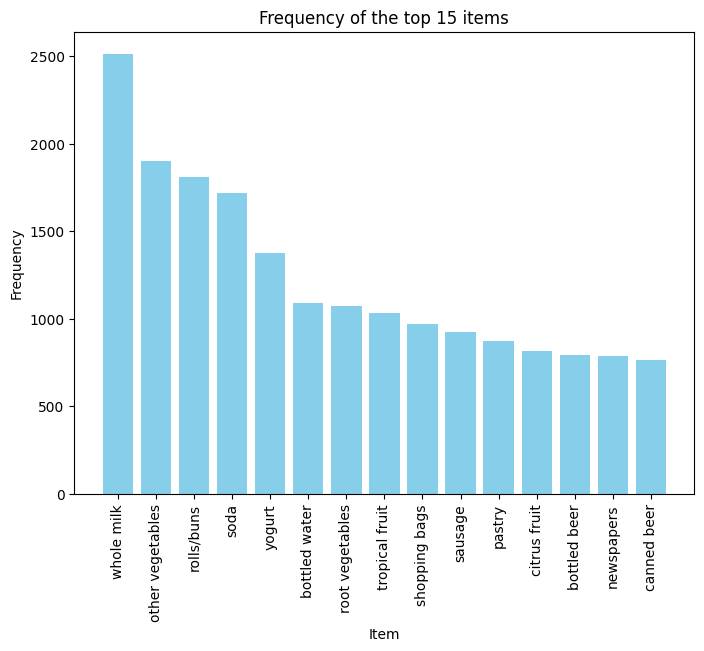

In [30]:
top_15_frequent_items = dict(list(frequent_items.items())[:15])

# Extract keys and values
items = list(top_15_frequent_items.keys())
frequencies = list(top_15_frequent_items.values())

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(items, frequencies, color='skyblue')

# Add labels and title
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Frequency of the top 15 items')

# Rotate x-axis labels to horizontal
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [31]:
# Print the most frequent items found
print("Frequent item dictionary:")
print(frequent_items)

# Print the number of unique items found
unique_items = frequent_items.keys()
print('\n' + '-' * 50 + "\n\nNumber of unique items found:")
print(len(unique_items))

# To get average number of items in a transaction, take the total number of items divided by the number of transactions
average_num_items = num_items_in_transactions / num_transactions
print('\n' + '-' * 50 + "\n\nAverage number of items within a transaction:")
print(average_num_items)

# Print the min number of items within a transaction
print('\n' + '-' * 50 + "\n\nMinimum number of items found in a transaction:")
print(min_num_items)
print("\nThis is what that transaction looked like:")
print(min_num_items_transaction)

# Print the max number of items within a transaction
print('\n' + '-' * 50 + "\n\nMaximum number of items found in a transaction:")
print(max_num_items)
print("\nThis is what that transaction looked like:")
print(max_num_items_transaction)

Frequent item dictionary:
{'whole milk': 2513, 'other vegetables': 1903, 'rolls/buns': 1809, 'soda': 1715, 'yogurt': 1372, 'bottled water': 1087, 'root vegetables': 1072, 'tropical fruit': 1032, 'shopping bags': 969, 'sausage': 924, 'pastry': 875, 'citrus fruit': 814, 'bottled beer': 792, 'newspapers': 785, 'canned beer': 764, 'pip fruit': 744, 'fruit/vegetable juice': 711, 'whipped/sour cream': 705, 'brown bread': 638, 'domestic eggs': 624, 'frankfurter': 580, 'margarine': 576, 'coffee': 571, 'pork': 567, 'butter': 545, 'curd': 524, 'beef': 516, 'napkins': 515, 'chocolate': 488, 'frozen vegetables': 473, 'chicken': 422, 'white bread': 414, 'cream cheese': 390, 'waffles': 378, 'salty snack': 372, 'long life bakery product': 368, 'dessert': 365, 'sugar': 333, 'UHT-milk': 329, 'hamburger meat': 327, 'berries': 327, 'hygiene articles': 324, 'onions': 305, 'specialty chocolate': 299, 'candy': 294, 'misc. beverages': 279, 'frozen meals': 279, 'oil': 276, 'butter milk': 275, 'specialty bar':

### Let's summarize what we found:
####  -The most frequent item was 'whole milk' with a total of 2,513 purchases. This is followed by 'other vegtables' with 1,903 purchases. 
####  -There's a total of 169 unique items that were purchased
####  -The average number of items within a transaction is roughly 4.41 items
####  -The minimum number of items found in a transaction was 1 item
####  -The maximum number of items found in a transaction was 32 items
#### Now, let's do some...
# 3. Exploratory Data Analysis via Data Mining
### Let's first convert our data frame to use one-hot encoding
####  -This is necessary for the FP-growth algorithm


In [32]:
# Initialize new_df with 0s, we will use the index of df for transaction_id
new_df = pd.DataFrame(False, index=df.index, columns=unique_items)  # Set 0 by default

# Iterate through each transaction in df
for index, row in df.iterrows():
    # Get the number of items in the current transaction
    number_of_items = row.iloc[0] 
    
    # Get the items for this transaction (exclude 'number_of_items' column)
    transaction_items = row[1:number_of_items + 1].values  # The items start from column 1 onwards
    
    # We can directly use the row's index as the transaction_id
    transaction_id = index  # Here, `index` is used as the transaction ID
    
    # Set the corresponding items in new_df to 1
    for item in transaction_items:
        if pd.notna(item):  # Check for non-null items (None or NaN)
            new_df.at[transaction_id, item] = True  # Mark the item as present with 1


# Print the new shape of our data frame
print(f"Number of rows (transactions): {new_df.shape[0]} --- Number of columns (unique items) {new_df.shape[1]}")

# Select the first row (make sure it's a Series)
first = new_df.iloc[0]

# Loop through the row's columns and print the column name and value
print('\n' + '-' * 50 + "\n\nFirst transaction printed for example now that it's one-hot encoded:")
for column_name, value in first.items():
    print(f"Item: {column_name} --- Was it purchased? {value}")

Number of rows (transactions): 9835 --- Number of columns (unique items) 169

--------------------------------------------------

First transaction printed for example now that it's one-hot encoded:
Item: whole milk --- Was it purchased? False
Item: other vegetables --- Was it purchased? False
Item: rolls/buns --- Was it purchased? False
Item: soda --- Was it purchased? False
Item: yogurt --- Was it purchased? False
Item: bottled water --- Was it purchased? False
Item: root vegetables --- Was it purchased? False
Item: tropical fruit --- Was it purchased? False
Item: shopping bags --- Was it purchased? False
Item: sausage --- Was it purchased? False
Item: pastry --- Was it purchased? False
Item: citrus fruit --- Was it purchased? True
Item: bottled beer --- Was it purchased? False
Item: newspapers --- Was it purchased? False
Item: canned beer --- Was it purchased? False
Item: pip fruit --- Was it purchased? False
Item: fruit/vegetable juice --- Was it purchased? False
Item: whipped/sour

#### Great! Now we can ues the library imported earlier to apply the FP-growth algorithm

In [33]:
# Apply FP-growth algorithm
frequent_itemsets = fpgrowth(new_df, min_support=0.04, use_colnames=True)

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=100)

# Print association rules
print("\nAssociation Rules:")
print(rules)


Association Rules:
           antecedents         consequents  antecedent support  \
0             (yogurt)        (whole milk)            0.139502   
1         (whole milk)            (yogurt)            0.255516   
2   (other vegetables)            (yogurt)            0.193493   
3             (yogurt)  (other vegetables)            0.139502   
4         (whole milk)    (tropical fruit)            0.255516   
5     (tropical fruit)        (whole milk)            0.104931   
6   (other vegetables)        (whole milk)            0.193493   
7         (whole milk)  (other vegetables)            0.255516   
8   (other vegetables)        (rolls/buns)            0.193493   
9         (rolls/buns)  (other vegetables)            0.183935   
10        (whole milk)        (rolls/buns)            0.255516   
11        (rolls/buns)        (whole milk)            0.183935   
12  (other vegetables)   (root vegetables)            0.193493   
13   (root vegetables)  (other vegetables)            0.

### Interesting! Above is some associative rules for the items
### For example, with minimum antecedent support set at 0.04, 
### if you're to buy 'whole milk' you're likely to also purchase:
####  -yogurt
####  -tropical fruit
####  -other vegetables
####  -rolls/buns
####  -root vegetables